### Course_Stable_Diffusion_Part_1.ipynb를 참고

#### 내 글카 자랑하는 시간

In [1]:
!nvidia-smi

Tue Jul  2 23:45:31 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.65                 Driver Version: 551.86         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        On  |   00000000:01:00.0  On |                  Off |
| 31%   47C    P0             86W /  450W |    1286MiB /  24564MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

##### 라이브러리들은 거의 다 설치되어 있음

##### 1년만에 보는 StableDiffusionPipeline

In [2]:
import torch
from diffusers import StableDiffusionPipeline

/home/kk4ever/anaconda3/envs/hg/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### 아직도 1.4가 되는구나

In [3]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  9.29it/s]


##### 파이프 전체게 쿠다 연결 (아마 프로세서, 모델 모두 적용이겠지)

In [4]:
pipe = pipe.to('cuda')

##### seed없이 실행

100%|██████████| 50/50 [00:01<00:00, 33.16it/s]


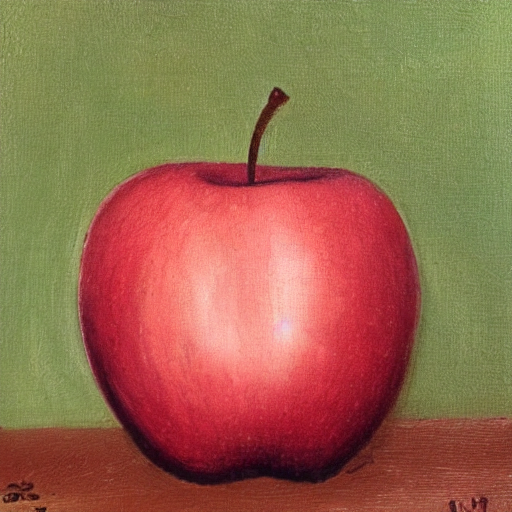

In [5]:
prompt = 'an apple'
img = pipe(prompt).images[0]
img

In [6]:
type(img)

PIL.Image.Image

##### 유명한사진

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:01<00:00, 35.72it/s]


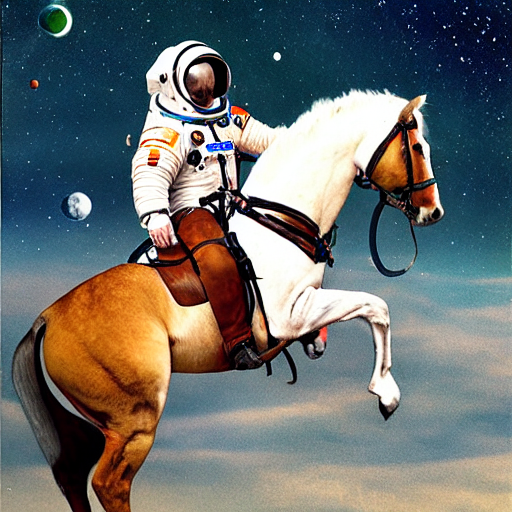

In [7]:
prompt = 'a photograph of an astronaut riding a horse, color'
img = pipe(prompt).images[0]
img

##### seed를 고정할 수도 있다

100%|██████████| 50/50 [00:01<00:00, 36.46it/s]


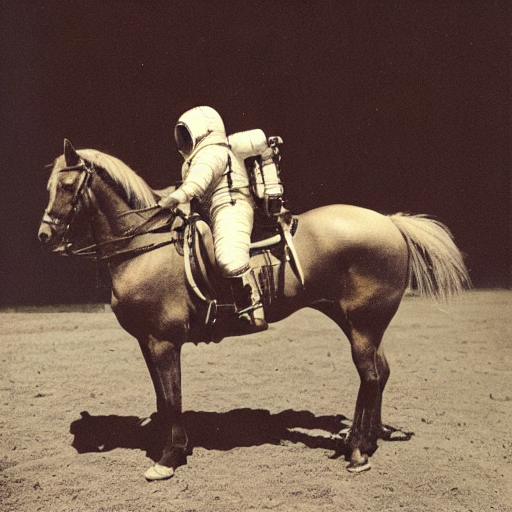

In [8]:
seed = 777
generator = torch.Generator('cuda').manual_seed(seed)
img = pipe(prompt, generator=generator).images[0]
img

##### 뭐 재밌군...

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:01<00:00, 36.50it/s]


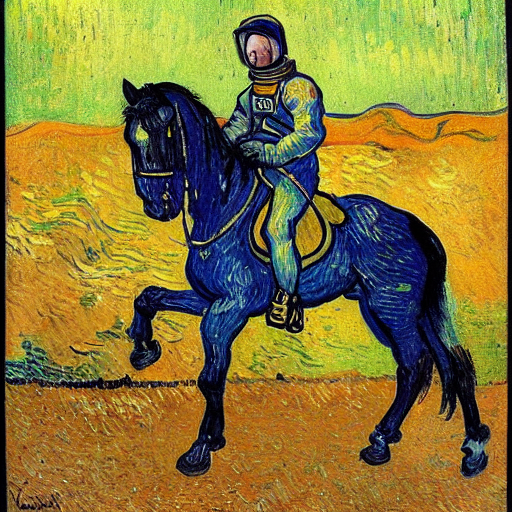

In [9]:
prompt = 'van gogh painting of an astronaut riding a horse'
img = pipe(prompt).images[0]
img

### Guidance scale (CFG)애 관해
7 ~ 8.5 가 적당하다고 설명

100%|██████████| 50/50 [00:01<00:00, 36.77it/s]


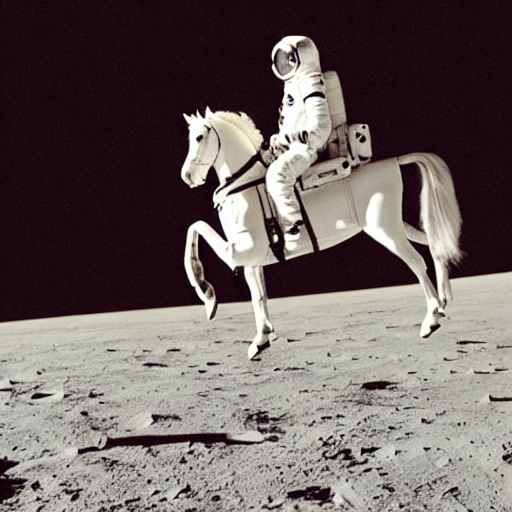

In [10]:
prompt = "a photograph of an astronaut riding a horse"
generator = torch.Generator("cuda").manual_seed(seed)
img = pipe(prompt, guidance_scale=10, generator=generator).images[0]
img

##### Negative prompt

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:01<00:00, 36.20it/s]


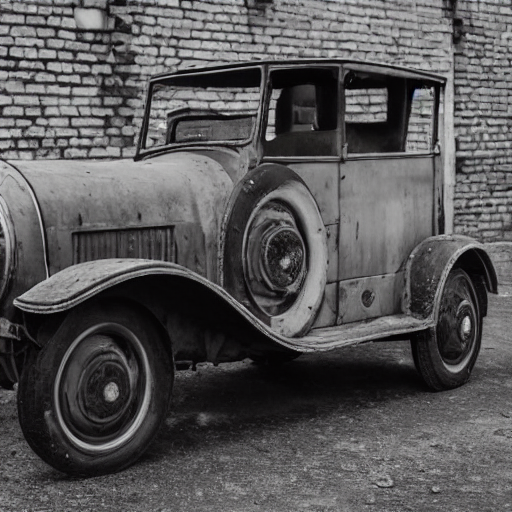

In [11]:
prompt = 'photograph of an old car'
neg_prompt = 'color photo'

img = pipe(prompt, negative_prompt = neg_prompt).images[0]
img

### 여기서부턴 1.5
정확히 기억나지 않지만 메모리 부족할때 쓰는 함수가 enable_attention_slicing()로 기억은 한다. 하지만 StableDiffusionPipeline의 메소드로 보이는데 다른 곳에서 봤던것으로도 기억

In [12]:
sd15 = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
sd15 = sd15.to('cuda')
# sd15.enable_attention_slicing()
# sd15.enable_xformers_memory_efficient_attention()

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 10.87it/s]


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:01<00:00, 33.61it/s]


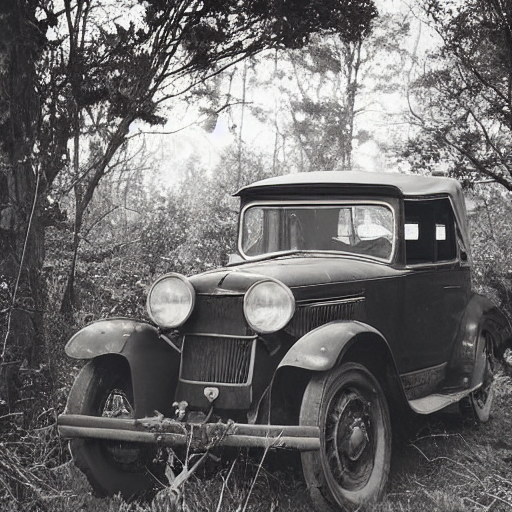

In [13]:
prompt = "photograph of an old car"
neg_prompt = "car wheels"

img = sd15(prompt, negative_prompt=neg_prompt).images[0]

img

###### SD2.0에 이어 "nitrosocke/mo-di-diffusion"를 소개하는 셀이 있었음

##### 스케줄러 (샘플러)

In [14]:
# 아직은 뭔지 모르겠군
sd15.scheduler

PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.27.2",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "leading",
  "trained_betas": null
}

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:01<00:00, 33.52it/s]


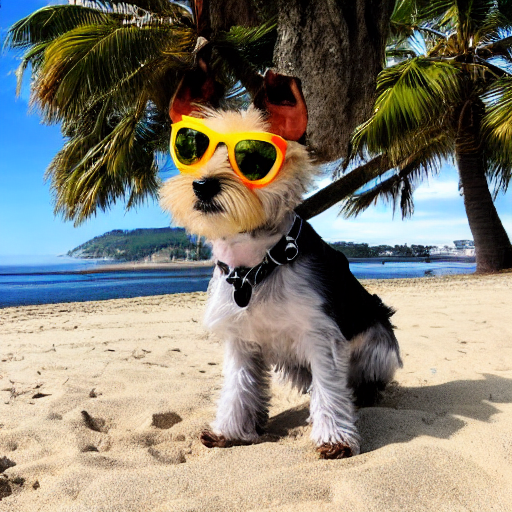

In [15]:
seed = 777
prompt = "a photo of a terrier wearing sunglasses, on the beach, ocean in the background"
generator = torch.Generator('cuda').manual_seed(seed)
img = sd15(prompt, generator=generator).images[0]
img

##### 어째 내것이 더 많이 뜬다 사실 다 뭔지는 모름. 느낌상 하나만 골라질것 같고

In [16]:
sd15.scheduler.compatibles

[diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2DiscreteScheduler,
 diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
 diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
 diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler,
 diffusers.schedulers.scheduling_edm_euler.EDMEulerScheduler,
 diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
 diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
 diffusers.utils.dummy_torch_and_torchsde_objects.DPMSolverSDEScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler,
 diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteSched

##### 이러니 보기는 좋다

In [17]:
sd15.scheduler.config

FrozenDict([('num_train_timesteps', 1000),
            ('beta_start', 0.00085),
            ('beta_end', 0.012),
            ('beta_schedule', 'scaled_linear'),
            ('trained_betas', None),
            ('skip_prk_steps', True),
            ('set_alpha_to_one', False),
            ('prediction_type', 'epsilon'),
            ('timestep_spacing', 'leading'),
            ('steps_offset', 1),
            ('_use_default_values', ['prediction_type', 'timestep_spacing']),
            ('_class_name', 'PNDMScheduler'),
            ('_diffusers_version', '0.27.2'),
            ('clip_sample', False)])

#### 갈아치워보자

In [18]:
from diffusers import DDIMScheduler
sd15.scheduler = DDIMScheduler.from_config(sd15.scheduler.config)

100%|██████████| 50/50 [00:01<00:00, 34.50it/s]


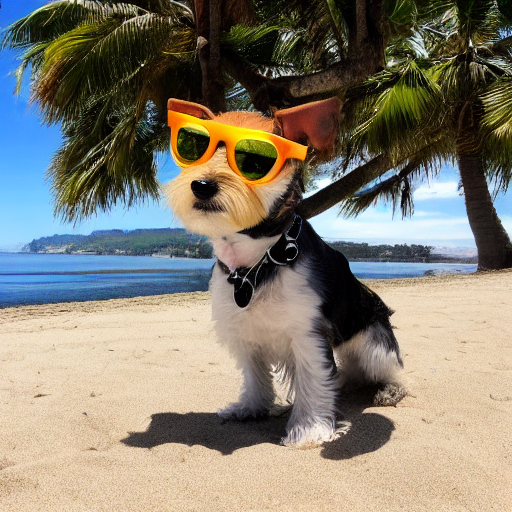

In [19]:
generator = torch.Generator(device = 'cuda').manual_seed(seed)
img = sd15(prompt, generator=generator).images[0]
img

  0%|          | 0/60 [00:00<?, ?it/s]

100%|██████████| 60/60 [00:01<00:00, 36.02it/s]


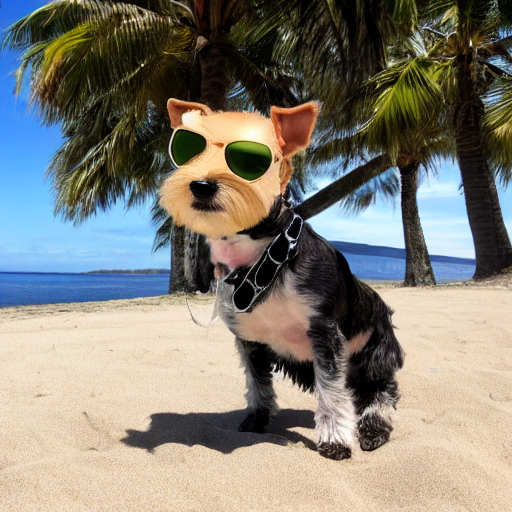

In [20]:
from diffusers import LMSDiscreteScheduler
sd15.scheduler = LMSDiscreteScheduler.from_config(sd15.scheduler.config)
generator = torch.Generator(device = 'cuda').manual_seed(seed)
img = sd15(prompt, num_inference_steps = 60, generator=generator).images[0]
img